# Actividad: Computar el VaR paramétrico y noparamétrico

## Lector del excel

In [32]:
# Convierte el excel a csv
import pandas as pd

def excel_a_csv(ruta_excel, ruta_csv):
    # Lee el archivo Excel
    df = pd.read_excel(ruta_excel)
    
    # Guarda el DataFrame como un archivo CSV
    df.to_csv(ruta_csv, index=False)

if __name__ == "__main__":
    ruta_excel = "2021.xlsx"
    ruta_csv = "datos.csv"
    excel_a_csv(ruta_excel, ruta_csv)
    print(f"Archivo convertido de {ruta_excel} a {ruta_csv}")

PermissionError: [Errno 13] Permission denied: 'datos.csv'

In [33]:
datos = pd.read_csv("datos.csv")

In [ ]:
datos

,Date,NVDA.O (TRDPRC_1),MSFT.O (TRDPRC_1),SIEGn.DE (TRDPRC_1),VLO (TRDPRC_1),BA (TRDPRC_1),JPM (TRDPRC_1),LMT (TRDPRC_1),THX.V (TRDPRC_1),FEIM.OQ (TRDPRC_1),GCX25 (TRDPRC_1),GOOGL.O (TRDPRC_1),INTC.O (TRDPRC_1),MU.O (TRDPRC_1),RY.TO (TRDPRC_1),8058.T (TRDPRC_1),SAND.K^J25 (TRDPRC_1),XAU= (BID)
0,NaN,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
1,2025-11-04,198.69,514.33,244.2,169.11,198.05,309.25,484.98,1.01,33.97,3947.7,277.54,37.03,218.03,205.4,3568,NaN,3931.78
2,2025-11-03,206.88,517.03,247.2,171.6,204.55,309.35,487.94,1.05,35.7,4000.3,283.72,39.5,234.7,207.22,NaN,NaN,4001.42
3,2025-10-31,202.49,517.81,245.55,169.56,201.02,311.12,491.88,1.06,36.72,3982.2,281.19,39.99,223.77,205.47,3712,NaN,4001.7798
4,2025-10-30,202.89,525.76,247,170.1,200.08,309.44,489.72,1.08,37.42,4001.3,281.48,40.16,224.01,204.12,3681,NaN,4023.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2021-11-16,30.2,339.51,153.6,77.94,225.8,165.36,340.37,0.315,7.83,NaN,147.88,50.61,76.81,132.65,1160.7,6.86,1849.91
997,2021-11-15,30.02,336.07,150.06,77.35,233.09,166.56,340.92,0.33,8.06,NaN,148.45,50.32,76.78,132.45,1146.7,7.03,1862.4591
998,2021-11-12,30.39,336.72,148.4,76.58,220.96,166.86,339.06,0.33,7.77,NaN,148.68,50.31,77.3,133.22,1154,7.02,1864.0441
999,2021-11-11,30.39,332.43,151.16,77.22,219.38,167.61,335.89,0.34,7.92,NaN,145.77,50.53,74.55,133.22,1135.3,6.99,1861.5244


In [34]:
# Elimina la primera fila que contiene datos irrelevantes
datos = datos.drop(index=0)

In [ ]:
datos

,Date,NVDA.O (TRDPRC_1),MSFT.O (TRDPRC_1),SIEGn.DE (TRDPRC_1),VLO (TRDPRC_1),BA (TRDPRC_1),JPM (TRDPRC_1),LMT (TRDPRC_1),THX.V (TRDPRC_1),FEIM.OQ (TRDPRC_1),GCX25 (TRDPRC_1),GOOGL.O (TRDPRC_1),INTC.O (TRDPRC_1),MU.O (TRDPRC_1),RY.TO (TRDPRC_1),8058.T (TRDPRC_1),SAND.K^J25 (TRDPRC_1),XAU= (BID)
1,2025-11-04,198.69,514.33,244.2,169.11,198.05,309.25,484.98,1.01,33.97,3947.7,277.54,37.03,218.03,205.4,3568,NaN,3931.78
2,2025-11-03,206.88,517.03,247.2,171.6,204.55,309.35,487.94,1.05,35.7,4000.3,283.72,39.5,234.7,207.22,NaN,NaN,4001.42
3,2025-10-31,202.49,517.81,245.55,169.56,201.02,311.12,491.88,1.06,36.72,3982.2,281.19,39.99,223.77,205.47,3712,NaN,4001.7798
4,2025-10-30,202.89,525.76,247,170.1,200.08,309.44,489.72,1.08,37.42,4001.3,281.48,40.16,224.01,204.12,3681,NaN,4023.22
5,2025-10-29,207.04,541.55,245.75,170.66,213.58,305.51,485.33,1.09,37.15,3986.2,274.57,41.34,226.63,204.55,3659,NaN,3929.3633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2021-11-16,30.2,339.51,153.6,77.94,225.8,165.36,340.37,0.315,7.83,NaN,147.88,50.61,76.81,132.65,1160.7,6.86,1849.91
997,2021-11-15,30.02,336.07,150.06,77.35,233.09,166.56,340.92,0.33,8.06,NaN,148.45,50.32,76.78,132.45,1146.7,7.03,1862.4591
998,2021-11-12,30.39,336.72,148.4,76.58,220.96,166.86,339.06,0.33,7.77,NaN,148.68,50.31,77.3,133.22,1154,7.02,1864.0441
999,2021-11-11,30.39,332.43,151.16,77.22,219.38,167.61,335.89,0.34,7.92,NaN,145.77,50.53,74.55,133.22,1135.3,6.99,1861.5244


In [ ]:
# Dime las columnas del DataFrame para eliminar las que no necesito
datos.columns

Index(['Date', 'NVDA.O (TRDPRC_1)', 'MSFT.O (TRDPRC_1)', 'SIEGn.DE (TRDPRC_1)',
       'VLO (TRDPRC_1)', 'BA (TRDPRC_1)', 'JPM (TRDPRC_1)', 'LMT (TRDPRC_1)',
       'THX.V (TRDPRC_1)', 'FEIM.OQ (TRDPRC_1)', 'GCX25 (TRDPRC_1)',
       'GOOGL.O (TRDPRC_1)', 'INTC.O (TRDPRC_1)', 'MU.O (TRDPRC_1)',
       'RY.TO (TRDPRC_1)', '8058.T (TRDPRC_1)', 'SAND.K^J25 (TRDPRC_1)',
       'XAU= (BID)'],
      dtype='object')

In [35]:
# Elimina las columnas irrelevantes (busca por subcadenas en los nombres de columna)
columnas_a_eliminar = ['RY.TO (TRDPRC_1)', '8058.T (TRDPRC_1)', 'THX.V (TRDPRC_1)', 'SAND.K^J25 (TRDPRC_1)', 'GCX25 (TRDPRC_1)']

# Buscar columnas que contienen cualquiera de los tickers definidos
cols_a_borrar = [col for col in datos.columns if any(ticker in col for ticker in columnas_a_eliminar)]

if cols_a_borrar:
	datos = datos.drop(columns=cols_a_borrar)
	print(f"Columnas eliminadas: {cols_a_borrar}")
else:
	print("No se encontraron columnas para eliminar.")

Columnas eliminadas: ['THX.V (TRDPRC_1)', 'GCX25 (TRDPRC_1)', 'RY.TO (TRDPRC_1)', '8058.T (TRDPRC_1)', 'SAND.K^J25 (TRDPRC_1)']


In [ ]:
datos.columns

Index(['Date', 'NVDA.O (TRDPRC_1)', 'MSFT.O (TRDPRC_1)', 'SIEGn.DE (TRDPRC_1)',
       'VLO (TRDPRC_1)', 'BA (TRDPRC_1)', 'JPM (TRDPRC_1)', 'LMT (TRDPRC_1)',
       'FEIM.OQ (TRDPRC_1)', 'GCX25 (TRDPRC_1)', 'GOOGL.O (TRDPRC_1)',
       'INTC.O (TRDPRC_1)', 'MU.O (TRDPRC_1)', 'XAU= (BID)'],
      dtype='object')

In [36]:
# Convertir Siemens AG de EUR a USD
# Tipo de cambio: 1 USD ≈ 0.867 EUR, entonces 1 EUR ≈ 1.1534 USD
tasa_cambio_eur_a_usd = 1 / 0.867  # ≈ 1.1534

# Primero convertir la columna a valores numéricos
datos['SIEGn.DE (TRDPRC_1)'] = pd.to_numeric(datos['SIEGn.DE (TRDPRC_1)'], errors='coerce')

# Multiplicar la columna de Siemens por la tasa de cambio
datos['SIEGn.DE (TRDPRC_1)'] = datos['SIEGn.DE (TRDPRC_1)'] * tasa_cambio_eur_a_usd

print(f"Siemens AG convertido de EUR a USD usando tasa de cambio: {tasa_cambio_eur_a_usd:.4f}")

Siemens AG convertido de EUR a USD usando tasa de cambio: 1.1534


In [ ]:
# Verificar la conversión - mostrar algunas filas de la columna de Siemens
print("Primeras filas de Siemens AG (ahora en USD):")
datos[['Date', 'SIEGn.DE (TRDPRC_1)']].head(10)

Primeras filas de Siemens AG (ahora en USD):


,Date,SIEGn.DE (TRDPRC_1)
1,2025-11-04,281.660900
2,2025-11-03,285.121107
3,2025-10-31,283.217993
4,2025-10-30,284.890427
5,2025-10-29,283.448674
6,2025-10-28,284.025375
7,2025-10-27,284.659746
8,2025-10-24,280.968858
9,2025-10-23,276.412918
10,2025-10-22,279.123414


## Agregar columnas para análisis de VaR

In [37]:
# Obtener las columnas de empresas (excluyendo Date)
import numpy as np

columnas_empresas = [col for col in datos.columns if col != 'Date']
num_empresas = len(columnas_empresas)

print(f"Número de empresas: {num_empresas}")
print(f"Empresas: {columnas_empresas}")

Número de empresas: 12
Empresas: ['NVDA.O (TRDPRC_1)', 'MSFT.O (TRDPRC_1)', 'SIEGn.DE (TRDPRC_1)', 'VLO (TRDPRC_1)', 'BA (TRDPRC_1)', 'JPM (TRDPRC_1)', 'LMT (TRDPRC_1)', 'FEIM.OQ (TRDPRC_1)', 'GOOGL.O (TRDPRC_1)', 'INTC.O (TRDPRC_1)', 'MU.O (TRDPRC_1)', 'XAU= (BID)']


In [39]:
# 1. Agregar columna de Días
datos['Dia'] = range(1, len(datos) + 1)

# 2. Convertir todas las columnas de precios a valores numéricos
for col in columnas_empresas:
    datos[col] = pd.to_numeric(datos[col], errors='coerce')

# 3. Definir pesos del portafolio para cada empresa (deben sumar 1)
# Pesos basados en un portafolio inicial de $1,000,000
pesos_dict = {
    'NVDA.O': 0.1111,      # NVIDIA - 11.11%
    'MSFT.O': 0.0989,      # Microsoft - 9.89%
    'SIEGn.DE': 0.1017,    # Siemens - 10.17%
    'VLO': 0.1120,         # Valero - 11.20%
    'BA': 0.0842,          # Boeing - 8.42%
    'JPM': 0.1058,         # JP Morgan - 10.58%
    'LMT': 0.1004,         # Lockheed - 10.04%
    'FEIM.OQ': 0.0504,     # Frequency - 5.04%
    'XAU=': 0.0356,        # Derivado Gold (XAU) - 3.56%
    'GOOGL.O': 0.0630,     # Alphabet - 6.30%
    'INTC.O': 0.0533,      # Intel - 5.33%
    'MU.O': 0.0836         # Micro - 8.36% (ajustado para completar 100%)
}

# Crear array de pesos en el mismo orden que columnas_empresas
pesos = np.array([pesos_dict.get(col.split()[0], 1/num_empresas) for col in columnas_empresas])

# Verificar que los pesos sumen 1 (o muy cerca de 1)
print(f"Suma de pesos: {pesos.sum():.4f}")

# Crear columnas de pesos para cada empresa
for i, col in enumerate(columnas_empresas):
    nombre_peso = f'Peso_{col.split()[0]}'  # Usa el ticker como nombre
    datos[nombre_peso] = pesos[i]

print("\nColumnas de pesos agregadas:")
for i, col in enumerate(columnas_empresas):
    ticker = col.split()[0]
    print(f"  {ticker}: {pesos[i]:.2%}")

Suma de pesos: 1.0000

Columnas de pesos agregadas:
  NVDA.O: 11.11%
  MSFT.O: 9.89%
  SIEGn.DE: 10.17%
  VLO: 11.20%
  BA: 8.42%
  JPM: 10.58%
  LMT: 10.04%
  FEIM.OQ: 5.04%
  GOOGL.O: 6.30%
  INTC.O: 5.33%
  MU.O: 8.36%
  XAU=: 3.56%


In [54]:
# 4. Calcular Vi (Valor del portafolio)
# Portafolio inicial V0 = $1,000,000 (hace 1000 días)
V0 = 1_000_000

# Los datos están ordenados de más reciente a más antiguo
# La ÚLTIMA fila es el día inicial (hace 1000 días), la PRIMERA es hoy

# Paso 1: Obtener precios iniciales (última fila = hace 1000 días)
precios_iniciales = {}
for col in columnas_empresas:
    precios_iniciales[col] = datos[col].iloc[-1]

# Paso 2: Calcular la cantidad de acciones compradas inicialmente con V0
# Cantidad_i = (V0 * Peso_i) / Precio_inicial_i
cantidades = {}
for i, col in enumerate(columnas_empresas):
    ticker = col.split()[0]
    inversion_inicial = V0 * pesos[i]
    precio_inicial = precios_iniciales[col]
    cantidades[col] = inversion_inicial / precio_inicial if precio_inicial > 0 else 0

# Paso 3: Calcular Vi para cada día multiplicando precio actual por cantidad de acciones
# Vi(t) = Σ(Precio_i(t) * Cantidad_i)
datos['Vi'] = 0
for col in columnas_empresas:
    datos['Vi'] += datos[col] * cantidades[col]

print("Columna Vi (Valor del portafolio) agregada")
print(f"V0 (inicial - hace 1000 días): ${V0:,.2f}")
print(f"Vi promedio: ${datos['Vi'].mean():,.2f}")
print(f"Vi hoy (primera fila - {datos['Date'].iloc[0]}): ${datos['Vi'].iloc[0]:,.2f}")
print(f"Vi inicial (última fila - {datos['Date'].iloc[-1]}): ${datos['Vi'].iloc[-1]:,.2f}")

Columna Vi (Valor del portafolio) agregada
V0 (inicial - hace 1000 días): $1,000,000.00
Vi promedio: $1,319,549.43
Vi hoy (primera fila - 2025-11-04): $2,434,752.79
Vi inicial (última fila - 2021-11-10): $1,000,000.00


In [55]:
# 5. Calcular P&L (Profit & Loss): cambio en el valor del portafolio de un día al siguiente
# P&L(t) = Vi(t) - Vi(t-1)
datos['P&L'] = datos['Vi'].diff()

# Para la primera fila, el P&L es NaN (no hay fila anterior)
print("Columna P&L agregada")
print(f"P&L promedio: ${datos['P&L'].mean():.4f}")

Columna P&L agregada
P&L promedio: $-1360.3859


In [56]:
# 6. Calcular Ranked P&L: ordenar el P&L de menor a mayor
# El rank te dice qué posición ocupa cada P&L cuando se ordena ascendentemente
datos['Ranked_P&L'] = datos['P&L'].rank(method='min', ascending=True)

print("Columna Ranked P&L agregada")
print(f"Ranked P&L mínimo: {datos['Ranked_P&L'].min()}")
print(f"Ranked P&L máximo: {datos['Ranked_P&L'].max()}")

Columna Ranked P&L agregada
Ranked P&L mínimo: 1.0
Ranked P&L máximo: 976.0


In [57]:
# 7. Calcular VaR (Value at Risk) - Método no paramétrico (histórico)
# VaR es el percentil de las pérdidas. Como P&L puede ser negativo (pérdida) o positivo (ganancia),
# buscamos el percentil inferior que representa las peores pérdidas.

# Eliminar valores NaN del P&L para el cálculo
pl_sin_nan = datos['P&L'].dropna()

# VaR al 1% - el 1% peor de los casos (percentil 1)
var_1_pct = np.percentile(pl_sin_nan, 1)

# VaR al 5% - el 5% peor de los casos (percentil 5)
var_5_pct = np.percentile(pl_sin_nan, 5)

# Agregar columnas con los valores de VaR (serán constantes en todas las filas)
datos['1_day_1%_VaR'] = var_1_pct
datos['1_day_5%_VaR'] = var_5_pct

print(f"\n=== RESULTADOS DEL VaR ===")
print(f"1 day 1% VaR: ${var_1_pct:.2f}")
print(f"1 day 5% VaR: ${var_5_pct:.2f}")
print(f"\nInterpretación:")
print(f"- Con 99% de confianza, la pérdida máxima en 1 día no excederá ${abs(var_1_pct):.2f}")
print(f"- Con 95% de confianza, la pérdida máxima en 1 día no excederá ${abs(var_5_pct):.2f}")


=== RESULTADOS DEL VaR ===
1 day 1% VaR: $-51731.96
1 day 5% VaR: $-29893.32

Interpretación:
- Con 99% de confianza, la pérdida máxima en 1 día no excederá $51731.96
- Con 95% de confianza, la pérdida máxima en 1 día no excederá $29893.32


In [ ]:
# Mostrar el DataFrame con todas las columnas agregadas
print(f"\nTotal de filas: {len(datos)}")
print(f"Total de columnas: {len(datos.columns)}")
print(f"\nPrimeras 10 filas:")
datos.head(10)


Total de filas: 1000
Total de columnas: 34

Primeras 10 filas:


,Date,NVDA.O (TRDPRC_1),MSFT.O (TRDPRC_1),SIEGn.DE (TRDPRC_1),VLO (TRDPRC_1),BA (TRDPRC_1),JPM (TRDPRC_1),LMT (TRDPRC_1),FEIM.OQ (TRDPRC_1),GCX25 (TRDPRC_1),...,Peso_GOOGL.O,Peso_INTC.O,Peso_MU.O,Peso_XAU=,Vi,P&L,Ranked_P&L,1_day_1%_VaR,1_day_5%_VaR,Precio_Ponderado
1,2025-11-04,198.69,514.33,281.660900,169.11,198.05,309.25,484.98,33.97,3947.7,...,0.063,0.0533,0.0389,0.0447,1.000000e+06,NaN,NaN,-22718.190487,-12368.026397,564.554241
2,2025-11-03,206.88,517.03,285.121107,171.60,204.55,309.35,487.94,35.70,4000.3,...,0.063,0.0533,0.0389,0.0447,1.015773e+06,15773.329575,179.0,-22718.190487,-12368.026397,573.459142
3,2025-10-31,202.49,517.81,283.217993,169.56,201.02,311.12,491.88,36.72,3982.2,...,0.063,0.0533,0.0389,0.0447,1.012793e+06,-2979.902601,73.0,-22718.190487,-12368.026397,571.776825
4,2025-10-30,202.89,525.76,284.890427,170.10,200.08,309.44,489.72,37.42,4001.3,...,0.063,0.0533,0.0389,0.0447,1.016864e+06,4070.095088,148.0,-22718.190487,-12368.026397,574.074614
5,2025-10-29,207.04,541.55,283.448674,170.66,213.58,305.51,485.33,37.15,3986.2,...,0.063,0.0533,0.0389,0.0447,1.011907e+06,-4956.371916,50.0,-22718.190487,-12368.026397,571.276474
6,2025-10-28,201.03,542.07,284.025375,169.34,223.33,305.36,485.77,37.58,3968.7,...,0.063,0.0533,0.0389,0.0447,1.011755e+06,-152.180171,102.0,-22718.190487,-12368.026397,571.190560
7,2025-10-27,191.49,531.52,284.659746,174.35,223.00,304.15,486.91,36.81,4005.5,...,0.063,0.0533,0.0389,0.0447,1.013499e+06,1744.285205,129.0,-22718.190487,-12368.026397,572.175303
8,2025-10-24,186.26,523.61,280.968858,171.05,221.35,300.44,485.41,37.47,4122.7,...,0.063,0.0533,0.0389,0.0447,1.025139e+06,11639.908436,176.0,-22718.190487,-12368.026397,578.746663
9,2025-10-23,182.16,520.56,276.412918,173.13,217.77,294.54,488.05,39.76,4130.6,...,0.063,0.0533,0.0389,0.0447,1.022367e+06,-2771.930092,76.0,-22718.190487,-12368.026397,577.181758
10,2025-10-22,180.28,520.54,279.123414,161.87,216.59,294.11,487.14,34.50,4050.5,...,0.063,0.0533,0.0389,0.0447,1.010996e+06,-11370.869916,11.0,-22718.190487,-12368.026397,570.762285


In [58]:
# Crear un resumen del portafolio con los valores actuales
print("=== RESUMEN DEL PORTAFOLIO ===\n")
print(f"Valor Inicial (V0 - hace 1000 días): ${V0:,.2f}")

# Los datos están ordenados de más reciente a más antiguo
# La primera fila es "hoy", la última es hace 1000 días
# Obtener el valor actual del portafolio (primera fila = día más reciente)
valor_actual = datos['Vi'].iloc[0]

print(f"Valor Actual (Hoy - {datos['Date'].iloc[0]}): ${valor_actual:,.2f}\n")

resumen_data = []
for i, col in enumerate(columnas_empresas):
    ticker = col.split()[0]
    peso = pesos[i]
    valor_hoy = valor_actual * peso  # Usar el valor actual, no el inicial
    resumen_data.append({
        'Empresa': ticker,
        'Peso': f'{peso:.2%}',
        'Valor Hoy': f'${valor_hoy:,.2f}'
    })

resumen_df = pd.DataFrame(resumen_data)
print(resumen_df.to_string(index=False))
print(f"\n{'='*50}")
print(f"Total: 100.00% | ${valor_actual:,.2f}")

=== RESUMEN DEL PORTAFOLIO ===

Valor Inicial (V0 - hace 1000 días): $1,000,000.00
Valor Actual (Hoy - 2025-11-04): $2,434,752.79

 Empresa   Peso   Valor Hoy
  NVDA.O 11.11% $270,501.04
  MSFT.O  9.89% $240,797.05
SIEGn.DE 10.17% $247,614.36
     VLO 11.20% $272,692.31
      BA  8.42% $205,006.19
     JPM 10.58% $257,596.85
     LMT 10.04% $244,449.18
 FEIM.OQ  5.04% $122,711.54
 GOOGL.O  6.30% $153,389.43
  INTC.O  5.33% $129,772.32
    MU.O  8.36% $203,545.33
    XAU=  3.56%  $86,677.20

Total: 100.00% | $2,434,752.79
 Empresa   Peso   Valor Hoy
  NVDA.O 11.11% $270,501.04
  MSFT.O  9.89% $240,797.05
SIEGn.DE 10.17% $247,614.36
     VLO 11.20% $272,692.31
      BA  8.42% $205,006.19
     JPM 10.58% $257,596.85
     LMT 10.04% $244,449.18
 FEIM.OQ  5.04% $122,711.54
 GOOGL.O  6.30% $153,389.43
  INTC.O  5.33% $129,772.32
    MU.O  8.36% $203,545.33
    XAU=  3.56%  $86,677.20

Total: 100.00% | $2,434,752.79


In [47]:
# Verificar el orden de los datos y las fechas
print("Primera fecha:", datos['Date'].iloc[0])
print("Última fecha:", datos['Date'].iloc[-1])
print(f"Vi en primera fecha: ${datos['Vi'].iloc[0]:,.2f}")
print(f"Vi en última fecha: ${datos['Vi'].iloc[-1]:,.2f}")
print(f"\nPrimeras 5 fechas:")
print(datos[['Date', 'Vi']].head())

Primera fecha: 2025-11-04
Última fecha: 2021-11-10
Vi en primera fecha: $1,000,000.00
Vi en última fecha: $543,089.70

Primeras 5 fechas:
         Date            Vi
1  2025-11-04  1.000000e+06
2  2025-11-03  1.017950e+06
3  2025-10-31  1.014106e+06
4  2025-10-30  1.017708e+06
5  2025-10-29  1.014468e+06


In [45]:
# Estadísticas del portafolio
print("\n=== ESTADÍSTICAS DEL PORTAFOLIO ===\n")
print(f"Valor Inicial (V0): ${V0:,.2f}")
print(f"Valor Final: ${datos['Vi'].iloc[-2]:,.2f}")  # -2 porque el último puede ser NaN
print(f"Valor Promedio: ${datos['Vi'].mean():,.2f}")
print(f"Valor Máximo: ${datos['Vi'].max():,.2f}")
print(f"Valor Mínimo: ${datos['Vi'].min():,.2f}")
print(f"\nRetorno Total: {((datos['Vi'].iloc[-2] / V0) - 1) * 100:.2f}%")
print(f"\nP&L Promedio Diario: ${datos['P&L'].mean():,.2f}")
print(f"P&L Máximo (mejor día): ${datos['P&L'].max():,.2f}")
print(f"P&L Mínimo (peor día): ${datos['P&L'].min():,.2f}")
print(f"\n=== VaR (Value at Risk) ===")
print(f"1 day 1% VaR: ${var_1_pct:,.2f} ({(var_1_pct/V0)*100:.3f}% del portafolio)")
print(f"1 day 5% VaR: ${var_5_pct:,.2f} ({(var_5_pct/V0)*100:.3f}% del portafolio)")


=== ESTADÍSTICAS DEL PORTAFOLIO ===

Valor Inicial (V0): $1,000,000.00
Valor Final: $546,104.89
Valor Promedio: $651,291.28
Valor Máximo: $1,033,421.11
Valor Mínimo: $450,162.87

Retorno Total: -45.39%

P&L Promedio Diario: $-428.81
P&L Máximo (mejor día): $35,169.54
P&L Mínimo (peor día): $-43,497.17

=== VaR (Value at Risk) ===
1 day 1% VaR: $-12,540.38 (-1.254% del portafolio)
1 day 5% VaR: $-8,059.21 (-0.806% del portafolio)


In [ ]:
datos

,Date,NVDA.O (TRDPRC_1),MSFT.O (TRDPRC_1),SIEGn.DE (TRDPRC_1),VLO (TRDPRC_1),BA (TRDPRC_1),JPM (TRDPRC_1),LMT (TRDPRC_1),FEIM.OQ (TRDPRC_1),GCX25 (TRDPRC_1),...,Peso_GOOGL.O,Peso_INTC.O,Peso_MU.O,Peso_XAU=,Vi,P&L,Ranked_P&L,1_day_1%_VaR,1_day_5%_VaR,Precio_Ponderado
1,2025-11-04,198.69,514.33,281.660900,169.11,198.05,309.25,484.98,33.97,3947.7,...,0.063,0.0533,0.0389,0.0447,1.000000e+06,NaN,NaN,-22718.190487,-12368.026397,564.554241
2,2025-11-03,206.88,517.03,285.121107,171.60,204.55,309.35,487.94,35.70,4000.3,...,0.063,0.0533,0.0389,0.0447,1.015773e+06,15773.329575,179.0,-22718.190487,-12368.026397,573.459142
3,2025-10-31,202.49,517.81,283.217993,169.56,201.02,311.12,491.88,36.72,3982.2,...,0.063,0.0533,0.0389,0.0447,1.012793e+06,-2979.902601,73.0,-22718.190487,-12368.026397,571.776825
4,2025-10-30,202.89,525.76,284.890427,170.10,200.08,309.44,489.72,37.42,4001.3,...,0.063,0.0533,0.0389,0.0447,1.016864e+06,4070.095088,148.0,-22718.190487,-12368.026397,574.074614
5,2025-10-29,207.04,541.55,283.448674,170.66,213.58,305.51,485.33,37.15,3986.2,...,0.063,0.0533,0.0389,0.0447,1.011907e+06,-4956.371916,50.0,-22718.190487,-12368.026397,571.276474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2021-11-16,30.20,339.51,177.162630,77.94,225.80,165.36,340.37,7.83,NaN,...,0.063,0.0533,0.0389,0.0447,NaN,NaN,NaN,-22718.190487,-12368.026397,NaN
997,2021-11-15,30.02,336.07,173.079585,77.35,233.09,166.56,340.92,8.06,NaN,...,0.063,0.0533,0.0389,0.0447,NaN,NaN,NaN,-22718.190487,-12368.026397,NaN
998,2021-11-12,30.39,336.72,171.164937,76.58,220.96,166.86,339.06,7.77,NaN,...,0.063,0.0533,0.0389,0.0447,NaN,NaN,NaN,-22718.190487,-12368.026397,NaN
999,2021-11-11,30.39,332.43,174.348328,77.22,219.38,167.61,335.89,7.92,NaN,...,0.063,0.0533,0.0389,0.0447,NaN,NaN,NaN,-22718.190487,-12368.026397,NaN


# Tarea


ANÁLISIS DE VALUE AT RISK (VaR)

=== Estadísticos del Portafolio ===
Valor inicial (V0): $1,000,000.00
Número de observaciones: 976
Media diaria de retorno (μ): 0.000629 (0.0629% diario)
Volatilidad diaria (σ): 0.013395 (1.3395% diario)
Volatilidad anualizada: 0.212643 (21.26%)

=== VaR Paramétrico (Distribución Normal) ===
Confianza VaR Paramétrico 1-día VaR Paramétrico 5-días
      95%            $21,404.41             $46,123.84
      99%            $30,533.18             $66,536.39

=== VaR Histórico (No Paramétrico) ===
Confianza VaR Histórico 1-día CVaR Histórico 1-día
      95%          $21,133.18           $30,738.89
      99%          $37,002.33           $49,617.53

Interpretación:
- Con 95% de confianza, la pérdida máxima en 1 día no excederá:
  • VaR Paramétrico: $21,404.41
  • VaR Histórico: $21,133.18

- Con 99% de confianza, la pérdida máxima en 1 día no excederá:
  • VaR Paramétrico: $30,533.18
  • VaR Histórico: $37,002.33

✓ Gráfica guardada como: pnl_histogram_var.p

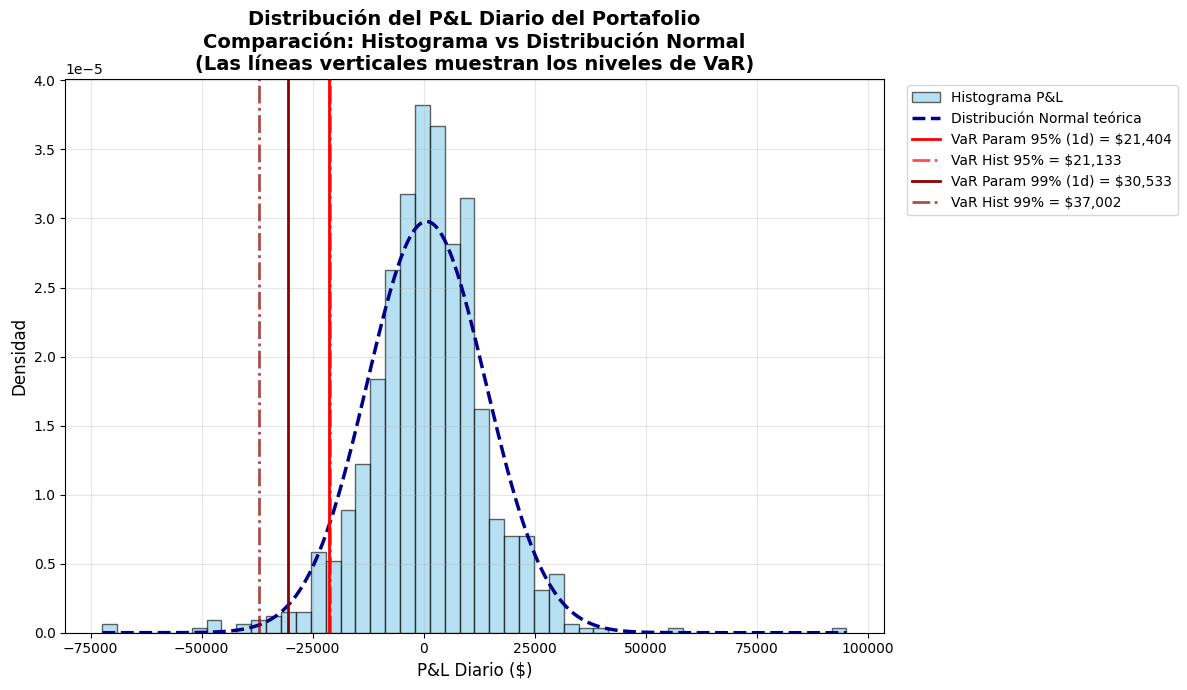

In [59]:
# Análisis de VaR (paramétrico y no paramétrico) adaptado a nuestra base de datos
"""
Análisis de VaR para un portafolio con pesos personalizados
Usa el DataFrame 'datos' ya cargado con 12 empresas
"""

import matplotlib.pyplot as plt
from scipy.stats import norm

# ---------------------------
# Parámetros
# ---------------------------
CONFIDENCES = [0.95, 0.99]  # niveles de confianza a calcular
HORIZON_5DAY = 5

# ---------------------------
# Preparación de datos
# ---------------------------
# Ya tenemos 'datos' cargado con Date y precios de las 12 empresas
# Los datos están ordenados de más reciente (fila 0) a más antiguo (última fila)

# Crear DataFrame solo con precios (sin Date ni columnas agregadas)
prices = datos[columnas_empresas].copy()

# Invertir el orden para que quede cronológico (más antiguo primero)
prices = prices.iloc[::-1].reset_index(drop=True)

# Calcular retornos diarios: log-returns
returns = np.log(prices / prices.shift(1)).dropna()

# Calcular retorno del portafolio diario (suma ponderada de retornos)
port_returns = returns.dot(pesos)

# Convertir retorno a P&L diario en moneda: P&L = V0 * retorno
pnl = V0 * port_returns

# Estadísticos del portafolio
mu_p = port_returns.mean()          # media diaria del retorno
sigma_p = port_returns.std(ddof=1)  # desviación estándar diaria

# ---------------------------
# VaR paramétrico (Normal)
# ---------------------------
# Fórmula: VaR_alpha = V0 * (z_alpha * sigma_p - mu_p)
# donde z_alpha es el valor crítico de la distribución normal estándar
z_values = {a: norm.ppf(a) for a in CONFIDENCES}

param_var = {}
param_var_5d = {}
for a in CONFIDENCES:
    z = z_values[a]
    var_1d = V0 * (z * sigma_p - mu_p)  # 1-day parametric VaR
    var_5d = V0 * (z * sigma_p * np.sqrt(HORIZON_5DAY) - mu_p * HORIZON_5DAY)  # 5-day
    param_var[a] = var_1d
    param_var_5d[a] = var_5d

# ---------------------------
# VaR no paramétrico (Histórico) y CVaR
# ---------------------------
hist_var = {}
hist_cvar = {}
for a in CONFIDENCES:
    percentile = (1 - a) * 100  # ej: para 95% -> percentil 5%
    quant = np.percentile(pnl, percentile)
    hist_var[a] = -quant  # VaR como pérdida positiva
    # CVaR: promedio de P&L en la cola peor que el percentil
    tail = pnl[pnl <= quant]
    if len(tail) > 0:
        hist_cvar[a] = -tail.mean()
    else:
        hist_cvar[a] = np.nan

# ---------------------------
# Resultados en tablas
# ---------------------------
param_table = pd.DataFrame({
    'Confianza': [f"{int(a*100)}%" for a in CONFIDENCES],
    'VaR Paramétrico 1-día': [f"${param_var[a]:,.2f}" for a in CONFIDENCES],
    'VaR Paramétrico 5-días': [f"${param_var_5d[a]:,.2f}" for a in CONFIDENCES]
})

hist_table = pd.DataFrame({
    'Confianza': [f"{int(a*100)}%" for a in CONFIDENCES],
    'VaR Histórico 1-día': [f"${hist_var[a]:,.2f}" for a in CONFIDENCES],
    'CVaR Histórico 1-día': [f"${hist_cvar[a]:,.2f}" for a in CONFIDENCES]
})

# Imprimir resultados
print("\n" + "="*70)
print("ANÁLISIS DE VALUE AT RISK (VaR)")
print("="*70)
print(f"\n=== Estadísticos del Portafolio ===")
print(f"Valor inicial (V0): ${V0:,.2f}")
print(f"Número de observaciones: {len(port_returns)}")
print(f"Media diaria de retorno (μ): {mu_p:.6f} ({mu_p*100:.4f}% diario)")
print(f"Volatilidad diaria (σ): {sigma_p:.6f} ({sigma_p*100:.4f}% diario)")
print(f"Volatilidad anualizada: {sigma_p*np.sqrt(252):.6f} ({sigma_p*np.sqrt(252)*100:.2f}%)")

print(f"\n=== VaR Paramétrico (Distribución Normal) ===")
print(param_table.to_string(index=False))

print(f"\n=== VaR Histórico (No Paramétrico) ===")
print(hist_table.to_string(index=False))

print("\n" + "="*70)
print("Interpretación:")
print(f"- Con 95% de confianza, la pérdida máxima en 1 día no excederá:")
print(f"  • VaR Paramétrico: ${param_var[0.95]:,.2f}")
print(f"  • VaR Histórico: ${hist_var[0.95]:,.2f}")
print(f"\n- Con 99% de confianza, la pérdida máxima en 1 día no excederá:")
print(f"  • VaR Paramétrico: ${param_var[0.99]:,.2f}")
print(f"  • VaR Histórico: ${hist_var[0.99]:,.2f}")
print("="*70)

# ---------------------------
# Visualización: Histograma P&L + curva normal + VaR
# ---------------------------
fig, ax = plt.subplots(figsize=(12,7))

# Histograma del P&L
n, bins, patches = ax.hist(pnl, bins=50, density=True, alpha=0.6, 
                           edgecolor='k', color='skyblue', label='Histograma P&L')

# Curva normal teórica
mu_pnl = V0 * mu_p
sigma_pnl = V0 * sigma_p
x = np.linspace(pnl.min(), pnl.max(), 1000)
pdf = norm.pdf(x, loc=mu_pnl, scale=sigma_pnl)
ax.plot(x, pdf, linewidth=2.5, color='darkblue', 
        label='Distribución Normal teórica', linestyle='--')

# Líneas de VaR
colors = {0.95: 'red', 0.99: 'darkred'}
for a in CONFIDENCES:
    # VaR paramétrico 1-día
    v_param = param_var[a]
    ax.axvline(-v_param, color=colors[a], linestyle='-', linewidth=2,
               label=f'VaR Param {int(a*100)}% (1d) = ${v_param:,.0f}')
    
    # VaR histórico
    v_hist = hist_var[a]
    ax.axvline(-v_hist, color=colors[a], linestyle='-.', linewidth=2, alpha=0.7,
               label=f'VaR Hist {int(a*100)}% = ${v_hist:,.0f}')

ax.set_title("Distribución del P&L Diario del Portafolio\n" + 
             "Comparación: Histograma vs Distribución Normal\n" +
             "(Las líneas verticales muestran los niveles de VaR)",
             fontsize=14, fontweight='bold')
ax.set_xlabel("P&L Diario ($)", fontsize=12)
ax.set_ylabel("Densidad", fontsize=12)
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1.0))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("pnl_histogram_var.png", dpi=300, bbox_inches='tight')
print("\n✓ Gráfica guardada como: pnl_histogram_var.png")

# ---------------------------
# Análisis de colas (Fat Tails)
# ---------------------------
print("\n" + "="*70)
print("ANÁLISIS DE COLAS (DISTRIBUCIÓN)")
print("="*70)

# Calcular percentiles del P&L histórico vs teórico
percentiles_test = [1, 5, 10, 90, 95, 99]
print(f"\n{'Percentil':<12} {'P&L Histórico':<20} {'P&L Normal':<20} {'Diferencia'}")
print("-" * 70)
for p in percentiles_test:
    hist_val = np.percentile(pnl, p)
    norm_val = norm.ppf(p/100, loc=mu_pnl, scale=sigma_pnl)
    diff = hist_val - norm_val
    print(f"{p}%{'':<9} ${hist_val:>10,.2f}{'':<7} ${norm_val:>10,.2f}{'':<7} ${diff:>10,.2f}")

print("\n" + "="*70)
print("OBSERVACIONES SOBRE LA COLA IZQUIERDA (Pérdidas):")
print("-" * 70)

# Análisis de asimetría y curtosis
from scipy.stats import skew, kurtosis
skewness = skew(pnl)
kurt = kurtosis(pnl)

print(f"• Asimetría (Skewness): {skewness:.4f}")
if skewness < -0.5:
    print("  → Cola izquierda MÁS PESADA (más pérdidas extremas que la normal)")
elif skewness > 0.5:
    print("  → Cola derecha más pesada (más ganancias extremas)")
else:
    print("  → Distribución relativamente simétrica")

print(f"\n• Curtosis (Kurtosis): {kurt:.4f}")
if kurt > 1:
    print("  → LEPTOCÚRTICA: Colas más pesadas que la normal (fat tails)")
    print("  → Mayor riesgo de eventos extremos")
elif kurt < -1:
    print("  → Platicúrtica: Colas más ligeras que la normal")
else:
    print("  → Similar a la distribución normal")

print("\n" + "="*70)
print("CONCLUSIÓN:")
print("="*70)
if kurt > 1 and skewness < -0.5:
    print("⚠ La distribución muestra COLAS PESADAS (fat tails) y asimetría negativa.")
    print("⚠ El VaR paramétrico (normal) podría SUBESTIMAR el riesgo real.")
    print("✓ Recomendación: Usar el VaR histórico o modelos más robustos.")
elif kurt > 1:
    print("⚠ La distribución muestra COLAS PESADAS (fat tails).")
    print("⚠ Hay mayor probabilidad de eventos extremos que la que sugiere la normal.")
else:
    print("✓ La distribución se aproxima razonablemente a la normal.")
    print("✓ El VaR paramétrico es una estimación adecuada.")

print("="*70)
